#### Install all packages

In [39]:
#Install all the packages
from __future__ import print_function
import pandas as pd
import numpy as np
from html.parser import HTMLParser
html_parser = HTMLParser()
from textblob import TextBlob
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from os import path
import matplotlib.pyplot as plt
from os import path
from wordcloud import WordCloud
import preprocessor as p
import logging
import pickle
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jennifer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
%pylab inline
import numpy 
import matplotlib.pyplot as plt
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [41]:
pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

height has been deprecated.



####  Configure Twitter Account

In [42]:
import requests
from requests_oauthlib import OAuth1

In [43]:
#Importing config file
import cnfg
config = cnfg.load(".twitter_config")

oauth = OAuth1(config["consumer_key"],
               config["consumer_secret"],
               config["access_token"],
               config["access_token_secret"])

In [249]:
response = requests.get("https://api.twitter.com/1.1/statuses/user_timeline.json",
                        auth=oauth)

tweets = response.json()
#tweets is a dictionary that has the following keys
for key in tweets[0].keys():
    print(key)
    

created_at
id
id_str
text
truncated
entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
lang


In [250]:
tweets[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Feb 22 18:45:23 +0000 2018',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 966745754936082432,
 'id_str': '966745754936082432',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'test',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Sat Dec 23 01:13:29 +0000 2017',
  'default_profile': True,
  'default_profile_image': True,
  'description': '',
  'entities': {'description': {'urls': []}},
  'favourites_count': 0,
  'follow_request_sent': False,
  'followers_count': 0,
  'following': False,
  'fr

In [113]:
#Check what tweets have been sent
for tweet in tweets:
    print(tweet['text'])

test


### Read in tweets from Tweepy

In [44]:
# !pip install tweepy
# Tweepy allows you to obtain real time streaming tweets
import tweepy


In [45]:
auth = tweepy.OAuthHandler(config["consumer_key"],
                           config["consumer_secret"])
auth.set_access_token(config["access_token"],
                      config["access_token_secret"])

# api=tweepy.API(auth)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [84]:
import json
max_tweets=50000
query = 'NRA'  #search for specific hashtags
results2=[]



In [85]:
#Specify dates from which to collect data
for tweet in tweepy.Cursor(api.search,q=query,lang="en",tweet_mode="extended",).items(max_tweets):
    if (not tweet.retweeted):
        results2.append(tweet)



2018-03-10 07:01:51,632 : INFO : PARAMS: {'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}


Rate limit reached. Sleeping for: 551


2018-03-10 07:11:08,152 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:08,180 : INFO : PARAMS: {'max_id': b'972489970656206847', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:08,399 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:08,405 : INFO : PARAMS: {'max_id': b'972489962544353279', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:08,632 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:08,654 : INFO : PARAMS: {'max_id': b'972489953295978497', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:08,829 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:08,838 : INFO : PARAMS: {'max_id': b'972489942881325060', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:08,994 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:09,002 : INFO : PARAMS: {'max_id': b'972489931107876863', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:09,209 : INFO : PARAMS: {'cr

2018-03-10 07:11:16,916 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:16,923 : INFO : PARAMS: {'max_id': b'972489532493959173', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:17,121 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:17,126 : INFO : PARAMS: {'max_id': b'972489518929661951', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:17,470 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:17,475 : INFO : PARAMS: {'max_id': b'972489510347948031', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:17,661 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:17,666 : INFO : PARAMS: {'max_id': b'972489496846569471', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:17,858 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:17,867 : INFO : PARAMS: {'max_id': b'972489487136710655', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:18,111 : INFO : PARAMS: {'cr

2018-03-10 07:11:26,536 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:26,542 : INFO : PARAMS: {'max_id': b'972489069891596293', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:26,696 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:26,701 : INFO : PARAMS: {'max_id': b'972489059267497983', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:26,857 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:26,862 : INFO : PARAMS: {'max_id': b'972489051579322367', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:27,035 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:27,041 : INFO : PARAMS: {'max_id': b'972489043400261634', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:27,193 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:27,198 : INFO : PARAMS: {'max_id': b'972489026513940480', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:27,396 : INFO : PARAMS: {'cr

2018-03-10 07:11:36,001 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:36,007 : INFO : PARAMS: {'max_id': b'972488603535396863', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:36,193 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:36,198 : INFO : PARAMS: {'max_id': b'972488594085433343', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:36,360 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:36,365 : INFO : PARAMS: {'max_id': b'972488577010622465', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:36,668 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:36,673 : INFO : PARAMS: {'max_id': b'972488566138847231', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:36,886 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:36,891 : INFO : PARAMS: {'max_id': b'972488557125423103', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:37,255 : INFO : PARAMS: {'cr

2018-03-10 07:11:45,281 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:45,286 : INFO : PARAMS: {'max_id': b'972488154358976511', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:45,466 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:45,471 : INFO : PARAMS: {'max_id': b'972488144200216578', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:45,611 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:45,616 : INFO : PARAMS: {'max_id': b'972488131290296320', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:45,935 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:45,941 : INFO : PARAMS: {'max_id': b'972488119013404672', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:46,177 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:11:46,187 : INFO : PARAMS: {'max_id': b'972488103851102213', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:11:46,440 : INFO : PARAMS: {'cr

Rate limit reached. Sleeping for: 861


2018-03-10 07:26:13,136 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:13,142 : INFO : PARAMS: {'max_id': b'972488056451186688', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:13,323 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:13,329 : INFO : PARAMS: {'max_id': b'972488042089992192', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:13,496 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:13,501 : INFO : PARAMS: {'max_id': b'972488031935528964', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:13,727 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:13,733 : INFO : PARAMS: {'max_id': b'972488019507851263', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:13,935 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:13,942 : INFO : PARAMS: {'max_id': b'972488012599787519', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:14,102 : INFO : PARAMS: {'cr

2018-03-10 07:26:22,246 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:22,251 : INFO : PARAMS: {'max_id': b'972487587519705087', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:22,449 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:22,454 : INFO : PARAMS: {'max_id': b'972487577801510911', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:22,647 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:22,653 : INFO : PARAMS: {'max_id': b'972487566858403839', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:22,830 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:22,837 : INFO : PARAMS: {'max_id': b'972487550882467844', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:23,012 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:23,017 : INFO : PARAMS: {'max_id': b'972487535514607615', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:23,161 : INFO : PARAMS: {'cr

2018-03-10 07:26:31,753 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:31,759 : INFO : PARAMS: {'max_id': b'972487114893004800', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:31,952 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:31,958 : INFO : PARAMS: {'max_id': b'972487107301265407', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:32,136 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:32,141 : INFO : PARAMS: {'max_id': b'972487098287575040', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:32,306 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:32,311 : INFO : PARAMS: {'max_id': b'972487084698099711', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:32,476 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:32,482 : INFO : PARAMS: {'max_id': b'972487074719911935', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:32,723 : INFO : PARAMS: {'cr

2018-03-10 07:26:41,060 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:41,066 : INFO : PARAMS: {'max_id': b'972486698457210881', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:41,284 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:41,290 : INFO : PARAMS: {'max_id': b'972486690370674687', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:41,503 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:41,509 : INFO : PARAMS: {'max_id': b'972486682309111813', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:41,681 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:41,688 : INFO : PARAMS: {'max_id': b'972486673861771263', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:41,861 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:41,868 : INFO : PARAMS: {'max_id': b'972486666299564033', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:42,270 : INFO : PARAMS: {'cr

2018-03-10 07:26:50,156 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:50,162 : INFO : PARAMS: {'max_id': b'972486280528318464', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:50,304 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:50,309 : INFO : PARAMS: {'max_id': b'972486267295469567', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:50,514 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:50,520 : INFO : PARAMS: {'max_id': b'972486259066200063', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:50,700 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:50,706 : INFO : PARAMS: {'max_id': b'972486246865014785', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:50,836 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:26:50,842 : INFO : PARAMS: {'max_id': b'972486235074842623', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:26:51,152 : INFO : PARAMS: {'cr

Rate limit reached. Sleeping for: 861


2018-03-10 07:41:17,782 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:17,787 : INFO : PARAMS: {'max_id': b'972486193039400959', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:17,977 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:17,988 : INFO : PARAMS: {'max_id': b'972486181068812289', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:18,162 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:18,170 : INFO : PARAMS: {'max_id': b'972486170696232959', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:18,330 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:18,335 : INFO : PARAMS: {'max_id': b'972486163108806655', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:18,514 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:18,523 : INFO : PARAMS: {'max_id': b'972486152333746175', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:18,816 : INFO : PARAMS: {'cr

2018-03-10 07:41:27,029 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:27,035 : INFO : PARAMS: {'max_id': b'972485734690009087', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:27,267 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:27,272 : INFO : PARAMS: {'max_id': b'972485724355416063', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:27,498 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:27,507 : INFO : PARAMS: {'max_id': b'972485713903210495', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:27,685 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:27,691 : INFO : PARAMS: {'max_id': b'972485703765504000', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:27,940 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:27,945 : INFO : PARAMS: {'max_id': b'972485686916997124', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:28,133 : INFO : PARAMS: {'cr

2018-03-10 07:41:35,658 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:35,665 : INFO : PARAMS: {'max_id': b'972485282472833023', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:35,970 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:35,976 : INFO : PARAMS: {'max_id': b'972485267838836736', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:36,332 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:36,337 : INFO : PARAMS: {'max_id': b'972485258477260799', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:36,549 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:36,554 : INFO : PARAMS: {'max_id': b'972485245416095744', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:36,759 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:36,765 : INFO : PARAMS: {'max_id': b'972485239342882816', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:37,148 : INFO : PARAMS: {'cr

2018-03-10 07:41:44,795 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:44,803 : INFO : PARAMS: {'max_id': b'972484824916287488', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:44,954 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:44,960 : INFO : PARAMS: {'max_id': b'972484816485560319', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:45,180 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:45,185 : INFO : PARAMS: {'max_id': b'972484808470298623', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:45,391 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:45,396 : INFO : PARAMS: {'max_id': b'972484799226052607', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:45,598 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:45,603 : INFO : PARAMS: {'max_id': b'972484788316753919', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:45,752 : INFO : PARAMS: {'cr

2018-03-10 07:41:53,425 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:53,431 : INFO : PARAMS: {'max_id': b'972484412658126847', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:53,586 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:53,592 : INFO : PARAMS: {'max_id': b'972484403057381375', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:53,755 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:53,760 : INFO : PARAMS: {'max_id': b'972484389086089215', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:53,910 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:53,917 : INFO : PARAMS: {'max_id': b'972484380928151551', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:54,112 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:41:54,117 : INFO : PARAMS: {'max_id': b'972484372791259135', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:41:54,266 : INFO : PARAMS: {'cr

Rate limit reached. Sleeping for: 863


2018-03-10 07:56:23,076 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:23,081 : INFO : PARAMS: {'max_id': b'972484337580085248', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:23,506 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:23,511 : INFO : PARAMS: {'max_id': b'972484328558120960', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:23,727 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:23,731 : INFO : PARAMS: {'max_id': b'972484319196340224', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:23,922 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:23,932 : INFO : PARAMS: {'max_id': b'972484306844246016', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:24,123 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:24,129 : INFO : PARAMS: {'max_id': b'972484299667599359', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:24,315 : INFO : PARAMS: {'cr

2018-03-10 07:56:32,405 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:32,410 : INFO : PARAMS: {'max_id': b'972483925191819263', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:32,604 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:32,610 : INFO : PARAMS: {'max_id': b'972483915461079040', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:32,802 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:32,809 : INFO : PARAMS: {'max_id': b'972483902156795904', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:32,989 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:32,994 : INFO : PARAMS: {'max_id': b'972483891884888064', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:33,206 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:33,213 : INFO : PARAMS: {'max_id': b'972483880807739392', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:33,449 : INFO : PARAMS: {'cr

2018-03-10 07:56:41,529 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:41,534 : INFO : PARAMS: {'max_id': b'972483506772180992', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:41,834 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:41,839 : INFO : PARAMS: {'max_id': b'972483497855242239', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:41,990 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:41,995 : INFO : PARAMS: {'max_id': b'972483487910514688', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:42,153 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:42,159 : INFO : PARAMS: {'max_id': b'972483479878406143', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:42,330 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:42,336 : INFO : PARAMS: {'max_id': b'972483468281241602', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:42,512 : INFO : PARAMS: {'cr

2018-03-10 07:56:50,449 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:50,455 : INFO : PARAMS: {'max_id': b'972483090437242879', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:50,693 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:50,698 : INFO : PARAMS: {'max_id': b'972483082094657536', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:50,869 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:50,874 : INFO : PARAMS: {'max_id': b'972483069633548287', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:51,034 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:51,039 : INFO : PARAMS: {'max_id': b'972483058841481221', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:51,239 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:51,247 : INFO : PARAMS: {'max_id': b'972483045063380991', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:51,482 : INFO : PARAMS: {'cr

2018-03-10 07:56:59,424 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:59,430 : INFO : PARAMS: {'max_id': b'972482620536774657', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:59,618 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:59,624 : INFO : PARAMS: {'max_id': b'972482607077347330', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:56:59,835 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:56:59,839 : INFO : PARAMS: {'max_id': b'972482594964156420', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:57:00,015 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:57:00,020 : INFO : PARAMS: {'max_id': b'972482587196317695', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:57:00,200 : INFO : PARAMS: {'create': b'True'}
2018-03-10 07:57:00,204 : INFO : PARAMS: {'max_id': b'972482578782588927', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 07:57:00,394 : INFO : PARAMS: {'cr

Rate limit reached. Sleeping for: 862


2018-03-10 08:11:28,008 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:28,013 : INFO : PARAMS: {'max_id': b'972482539532234751', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:28,196 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:28,201 : INFO : PARAMS: {'max_id': b'972482529411334143', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:28,385 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:28,390 : INFO : PARAMS: {'max_id': b'972482520649555967', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:28,572 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:28,577 : INFO : PARAMS: {'max_id': b'972482507621982207', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:28,733 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:28,738 : INFO : PARAMS: {'max_id': b'972482496012021760', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:28,899 : INFO : PARAMS: {'cr

2018-03-10 08:11:37,006 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:37,014 : INFO : PARAMS: {'max_id': b'972482108668170241', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:37,165 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:37,170 : INFO : PARAMS: {'max_id': b'972482100887683071', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:37,495 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:37,500 : INFO : PARAMS: {'max_id': b'972482092348063744', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:37,645 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:37,650 : INFO : PARAMS: {'max_id': b'972482079949717503', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:37,869 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:37,875 : INFO : PARAMS: {'max_id': b'972482065626099713', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:38,080 : INFO : PARAMS: {'cr

2018-03-10 08:11:46,281 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:46,288 : INFO : PARAMS: {'max_id': b'972481643763007487', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:46,437 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:46,442 : INFO : PARAMS: {'max_id': b'972481634514718719', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:46,634 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:46,639 : INFO : PARAMS: {'max_id': b'972481624100212735', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:46,812 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:46,819 : INFO : PARAMS: {'max_id': b'972481614973370367', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:47,021 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:47,027 : INFO : PARAMS: {'max_id': b'972481606085726207', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:47,242 : INFO : PARAMS: {'cr

2018-03-10 08:11:55,613 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:55,618 : INFO : PARAMS: {'max_id': b'972481206662127617', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:55,780 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:55,787 : INFO : PARAMS: {'max_id': b'972481200454500351', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:55,956 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:55,960 : INFO : PARAMS: {'max_id': b'972481191415775232', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:56,126 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:56,131 : INFO : PARAMS: {'max_id': b'972481180535808000', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:56,339 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:11:56,344 : INFO : PARAMS: {'max_id': b'972481175087443967', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:11:56,526 : INFO : PARAMS: {'cr

2018-03-10 08:12:05,132 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:12:05,139 : INFO : PARAMS: {'max_id': b'972480766247567359', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:12:05,351 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:12:05,356 : INFO : PARAMS: {'max_id': b'972480759264104449', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:12:05,685 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:12:05,690 : INFO : PARAMS: {'max_id': b'972480747461382143', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:12:05,981 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:12:05,986 : INFO : PARAMS: {'max_id': b'972480739550744575', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:12:06,143 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:12:06,148 : INFO : PARAMS: {'max_id': b'972480732693180415', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:12:06,388 : INFO : PARAMS: {'cr

Rate limit reached. Sleeping for: 861


2018-03-10 08:26:33,000 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:33,004 : INFO : PARAMS: {'max_id': b'972480683892445184', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:33,303 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:33,310 : INFO : PARAMS: {'max_id': b'972480674702811135', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:33,461 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:33,466 : INFO : PARAMS: {'max_id': b'972480665018040319', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:33,656 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:33,663 : INFO : PARAMS: {'max_id': b'972480656604319744', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:33,843 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:33,848 : INFO : PARAMS: {'max_id': b'972480644562538497', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:34,063 : INFO : PARAMS: {'cr

2018-03-10 08:26:42,559 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:42,564 : INFO : PARAMS: {'max_id': b'972480237186502655', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:42,869 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:42,874 : INFO : PARAMS: {'max_id': b'972480225484378111', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:43,042 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:43,046 : INFO : PARAMS: {'max_id': b'972480217649381376', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:43,272 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:43,280 : INFO : PARAMS: {'max_id': b'972480209193787391', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:43,514 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:43,520 : INFO : PARAMS: {'max_id': b'972480199634882559', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:43,750 : INFO : PARAMS: {'cr

2018-03-10 08:26:51,310 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:51,316 : INFO : PARAMS: {'max_id': b'972479808277016582', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:51,459 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:51,464 : INFO : PARAMS: {'max_id': b'972479791134855170', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:51,768 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:51,773 : INFO : PARAMS: {'max_id': b'972479782377197567', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:51,955 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:51,961 : INFO : PARAMS: {'max_id': b'972479773946662913', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:52,106 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:26:52,111 : INFO : PARAMS: {'max_id': b'972479764119412735', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:26:52,308 : INFO : PARAMS: {'cr

2018-03-10 08:27:00,181 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:27:00,187 : INFO : PARAMS: {'max_id': b'972479386241978372', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:27:00,472 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:27:00,477 : INFO : PARAMS: {'max_id': b'972479374074306561', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:27:00,665 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:27:00,670 : INFO : PARAMS: {'max_id': b'972479364335095813', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:27:00,827 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:27:00,832 : INFO : PARAMS: {'max_id': b'972479350980390911', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:27:01,025 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:27:01,031 : INFO : PARAMS: {'max_id': b'972479341232869382', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:27:01,213 : INFO : PARAMS: {'cr

2018-03-10 08:27:09,554 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:27:09,560 : INFO : PARAMS: {'max_id': b'972478897848770561', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:27:09,708 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:27:09,713 : INFO : PARAMS: {'max_id': b'972478886213713920', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:27:09,885 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:27:09,891 : INFO : PARAMS: {'max_id': b'972478874159403008', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:27:10,042 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:27:10,047 : INFO : PARAMS: {'max_id': b'972478864336261119', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:27:10,237 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:27:10,242 : INFO : PARAMS: {'max_id': b'972478851157815296', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:27:10,412 : INFO : PARAMS: {'cr

Rate limit reached. Sleeping for: 862


2018-03-10 08:41:38,070 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:38,077 : INFO : PARAMS: {'max_id': b'972478816374415359', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:38,235 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:38,240 : INFO : PARAMS: {'max_id': b'972478807717351423', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:38,371 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:38,375 : INFO : PARAMS: {'max_id': b'972478801824440320', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:38,530 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:38,535 : INFO : PARAMS: {'max_id': b'972478793272250368', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:38,731 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:38,737 : INFO : PARAMS: {'max_id': b'972478779095478274', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:38,936 : INFO : PARAMS: {'cr

2018-03-10 08:41:46,281 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:46,285 : INFO : PARAMS: {'max_id': b'972478382310006783', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:46,448 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:46,453 : INFO : PARAMS: {'max_id': b'972478369651605505', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:46,603 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:46,609 : INFO : PARAMS: {'max_id': b'972478361145630720', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:46,757 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:46,762 : INFO : PARAMS: {'max_id': b'972478349963505664', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:46,948 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:46,954 : INFO : PARAMS: {'max_id': b'972478333869989887', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:47,126 : INFO : PARAMS: {'cr

2018-03-10 08:41:54,331 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:54,336 : INFO : PARAMS: {'max_id': b'972477916024995840', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:54,559 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:54,563 : INFO : PARAMS: {'max_id': b'972477905287524352', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:54,703 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:54,708 : INFO : PARAMS: {'max_id': b'972477897968668672', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:54,864 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:54,870 : INFO : PARAMS: {'max_id': b'972477888351129599', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:55,017 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:41:55,021 : INFO : PARAMS: {'max_id': b'972477879207555071', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:41:55,231 : INFO : PARAMS: {'cr

2018-03-10 08:42:03,236 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:42:03,242 : INFO : PARAMS: {'max_id': b'972477455624744959', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:42:03,431 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:42:03,437 : INFO : PARAMS: {'max_id': b'972477446166638593', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:42:03,611 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:42:03,619 : INFO : PARAMS: {'max_id': b'972477437568151554', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:42:03,792 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:42:03,798 : INFO : PARAMS: {'max_id': b'972477420740767744', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:42:03,973 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:42:03,978 : INFO : PARAMS: {'max_id': b'972477410657660927', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:42:04,154 : INFO : PARAMS: {'cr

2018-03-10 08:42:11,457 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:42:11,463 : INFO : PARAMS: {'max_id': b'972476984851709951', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:42:11,620 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:42:11,625 : INFO : PARAMS: {'max_id': b'972476977331539967', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:42:11,833 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:42:11,838 : INFO : PARAMS: {'max_id': b'972476966556372991', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:42:12,013 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:42:12,018 : INFO : PARAMS: {'max_id': b'972476957806936063', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:42:12,170 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:42:12,177 : INFO : PARAMS: {'max_id': b'972476946624937983', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:42:12,328 : INFO : PARAMS: {'cr

Rate limit reached. Sleeping for: 865


2018-03-10 08:56:42,986 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:42,991 : INFO : PARAMS: {'max_id': b'972476899132956671', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:43,128 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:43,135 : INFO : PARAMS: {'max_id': b'972476889393778688', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:43,309 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:43,313 : INFO : PARAMS: {'max_id': b'972476878328971263', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:43,515 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:43,520 : INFO : PARAMS: {'max_id': b'972476868044738559', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:43,692 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:43,697 : INFO : PARAMS: {'max_id': b'972476858171318271', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:43,877 : INFO : PARAMS: {'cr

2018-03-10 08:56:50,717 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:50,722 : INFO : PARAMS: {'max_id': b'972476434441736196', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:50,906 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:50,912 : INFO : PARAMS: {'max_id': b'972476426720108544', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:51,076 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:51,082 : INFO : PARAMS: {'max_id': b'972476416079081472', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:51,220 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:51,225 : INFO : PARAMS: {'max_id': b'972476405790289920', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:51,399 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:51,404 : INFO : PARAMS: {'max_id': b'972476395468349440', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:51,560 : INFO : PARAMS: {'cr

2018-03-10 08:56:59,066 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:59,073 : INFO : PARAMS: {'max_id': b'972475971847753727', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:59,432 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:59,436 : INFO : PARAMS: {'max_id': b'972475959915040768', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:59,554 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:59,560 : INFO : PARAMS: {'max_id': b'972475947847966719', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:59,729 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:59,735 : INFO : PARAMS: {'max_id': b'972475937462906880', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:56:59,924 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:56:59,931 : INFO : PARAMS: {'max_id': b'972475929359474687', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:00,127 : INFO : PARAMS: {'cr

2018-03-10 08:57:07,902 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:57:07,907 : INFO : PARAMS: {'max_id': b'972475530812542976', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:08,064 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:57:08,069 : INFO : PARAMS: {'max_id': b'972475516589690879', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:08,242 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:57:08,248 : INFO : PARAMS: {'max_id': b'972475508595113985', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:08,796 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:57:08,802 : INFO : PARAMS: {'max_id': b'972475496943575039', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:08,983 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:57:08,988 : INFO : PARAMS: {'max_id': b'972475488269733887', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:09,168 : INFO : PARAMS: {'cr

2018-03-10 08:57:15,830 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:57:15,835 : INFO : PARAMS: {'max_id': b'972475089064218623', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:16,004 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:57:16,009 : INFO : PARAMS: {'max_id': b'972475077014024192', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:16,180 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:57:16,184 : INFO : PARAMS: {'max_id': b'972475067345944575', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:16,384 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:57:16,390 : INFO : PARAMS: {'max_id': b'972475050208178176', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:16,540 : INFO : PARAMS: {'create': b'True'}
2018-03-10 08:57:16,544 : INFO : PARAMS: {'max_id': b'972475037914685439', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 08:57:16,699 : INFO : PARAMS: {'cr

Rate limit reached. Sleeping for: 865


2018-03-10 09:11:47,298 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:11:47,304 : INFO : PARAMS: {'max_id': b'972474989638111232', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:11:47,599 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:11:47,605 : INFO : PARAMS: {'max_id': b'972474979110522879', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:11:47,812 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:11:47,821 : INFO : PARAMS: {'max_id': b'972474969945989119', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:11:47,957 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:11:47,963 : INFO : PARAMS: {'max_id': b'972474956360667135', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:11:48,291 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:11:48,296 : INFO : PARAMS: {'max_id': b'972474946696957952', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:11:48,450 : INFO : PARAMS: {'cr

2018-03-10 09:11:55,370 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:11:55,375 : INFO : PARAMS: {'max_id': b'972474558669234175', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:11:55,589 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:11:55,594 : INFO : PARAMS: {'max_id': b'972474548103892991', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:11:55,742 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:11:55,747 : INFO : PARAMS: {'max_id': b'972474538092060673', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:11:55,933 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:11:55,943 : INFO : PARAMS: {'max_id': b'972474529284067328', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:11:56,085 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:11:56,091 : INFO : PARAMS: {'max_id': b'972474520916385796', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:11:56,291 : INFO : PARAMS: {'cr

2018-03-10 09:12:04,495 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:04,500 : INFO : PARAMS: {'max_id': b'972474106519027713', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:04,699 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:04,704 : INFO : PARAMS: {'max_id': b'972474094468804614', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:04,935 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:04,940 : INFO : PARAMS: {'max_id': b'972474085526646784', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:05,167 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:05,177 : INFO : PARAMS: {'max_id': b'972474069126930431', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:05,336 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:05,341 : INFO : PARAMS: {'max_id': b'972474062059593728', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:05,536 : INFO : PARAMS: {'cr

2018-03-10 09:12:12,390 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:12,397 : INFO : PARAMS: {'max_id': b'972473609871601664', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:32,933 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:32,939 : INFO : PARAMS: {'max_id': b'972473594138845183', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:33,099 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:33,104 : INFO : PARAMS: {'max_id': b'972473582281547775', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:33,275 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:33,280 : INFO : PARAMS: {'max_id': b'972473570931691519', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:33,427 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:33,434 : INFO : PARAMS: {'max_id': b'972473563365167104', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:33,589 : INFO : PARAMS: {'cr

2018-03-10 09:12:40,799 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:40,804 : INFO : PARAMS: {'max_id': b'972473108048293887', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:40,986 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:40,991 : INFO : PARAMS: {'max_id': b'972473098376278022', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:41,138 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:41,143 : INFO : PARAMS: {'max_id': b'972473089379487743', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:41,517 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:41,521 : INFO : PARAMS: {'max_id': b'972473079090831359', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:41,724 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:12:41,729 : INFO : PARAMS: {'max_id': b'972473070450610175', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:12:41,916 : INFO : PARAMS: {'cr

Rate limit reached. Sleeping for: 845


2018-03-10 09:26:52,744 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:26:52,749 : INFO : PARAMS: {'max_id': b'972473030126522367', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:26:52,890 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:26:52,895 : INFO : PARAMS: {'max_id': b'972473015844986880', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:26:53,060 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:26:53,066 : INFO : PARAMS: {'max_id': b'972473003949817855', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:26:53,210 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:26:53,214 : INFO : PARAMS: {'max_id': b'972472991383683071', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:26:53,367 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:26:53,372 : INFO : PARAMS: {'max_id': b'972472978855243775', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:26:53,512 : INFO : PARAMS: {'cr

2018-03-10 09:27:00,191 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:00,196 : INFO : PARAMS: {'max_id': b'972472527518912511', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:00,344 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:00,349 : INFO : PARAMS: {'max_id': b'972472512121655296', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:00,516 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:00,521 : INFO : PARAMS: {'max_id': b'972472505192599551', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:00,663 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:00,668 : INFO : PARAMS: {'max_id': b'972472496577445888', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:00,813 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:00,817 : INFO : PARAMS: {'max_id': b'972472486506921983', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:00,951 : INFO : PARAMS: {'cr

2018-03-10 09:27:08,294 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:08,298 : INFO : PARAMS: {'max_id': b'972472072239833087', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:08,512 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:08,517 : INFO : PARAMS: {'max_id': b'972472062437666815', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:08,681 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:08,686 : INFO : PARAMS: {'max_id': b'972472056204972038', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:08,995 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:09,002 : INFO : PARAMS: {'max_id': b'972472045698084864', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:09,142 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:09,146 : INFO : PARAMS: {'max_id': b'972472033366994943', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:09,297 : INFO : PARAMS: {'cr

2018-03-10 09:27:17,091 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:17,096 : INFO : PARAMS: {'max_id': b'972471618604879871', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:17,256 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:17,261 : INFO : PARAMS: {'max_id': b'972471608337199104', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:17,457 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:17,463 : INFO : PARAMS: {'max_id': b'972471598065356799', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:17,593 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:17,597 : INFO : PARAMS: {'max_id': b'972471588032581631', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:17,773 : INFO : PARAMS: {'create': b'True'}
2018-03-10 09:27:17,777 : INFO : PARAMS: {'max_id': b'972471579094470659', 'q': b'NRA', 'lang': b'en', 'tweet_mode': b'extended'}
2018-03-10 09:27:18,003 : INFO : PARAMS: {'cr

Rate limit reached. Sleeping for: 867


KeyboardInterrupt: 

In [86]:
len(results2)

26886

In [87]:
#Pickle results
# with open('results_NRA2.pkl','wb') as picklefile:
#     pickle.dump(results2,picklefile)

#### Open pickle files of the tweets

In [310]:
#Open pickle file results.pkl TEST FILE (100 tweets)
with open('results.pkl','rb') as picklefile:
    results = pickle.load(picklefile)

In [8]:
#Open pickle file: 30,000 Tweets with Hashtag NRA
with open('results_2018_02_26.pkl','rb') as picklefile:
    results_NRA = pickle.load(picklefile)

In [9]:
#Open pickle file: 30,000 Tweets with Hashtag NRA
with open('results_guns.pkl','rb') as picklefile:
    results_guns = pickle.load(picklefile)

In [89]:
with open('results_NRA2.pkl','rb') as picklefile:
    results_NRA2 = pickle.load(picklefile)

In [91]:
with open('results_guns2.pkl','rb') as picklefile:
    results_guns2 = pickle.load(picklefile)

In [82]:
#Check number of tweets
len(results_guns)

30000

In [47]:
#Check number of tweets
results_NRA[5000]

Status(_json={'created_at': 'Mon Feb 26 23:56:00 +0000 2018', 'id': 968273475554045953, 'id_str': '968273475554045953', 'full_text': 'RT @TitusNation: There are a couple "If\'s"  If the Lt Governor of Georgia happens to be an NRA member who might benefit from that Delta dis…', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TitusNation', 'name': 'Christopher Titus', 'id': 40996128, 'id_str': '40996128', 'indices': [3, 15]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 804330898720227328, 'id_str': '804330898720227328', 'name': 'Charles H Norman', 'screen_name': 'dovnorman18', 'location': 'Fort Worth, TX

In [215]:
#Checking hashtags
[tweet.entities['hashtags'] for tweet in results_NRA]

[[],
 [],
 [],
 [{'indices': [19, 23], 'text': 'NRA'}, {'indices': [28, 32], 'text': 'GOP'}],
 [{'indices': [117, 130], 'text': 'ResignIsrael'},
  {'indices': [131, 141], 'text': 'ObamaGate'}],
 [{'indices': [99, 104], 'text': 'MAGA'}],
 [],
 [],
 [],
 [{'indices': [87, 103], 'text': 'FireScottIsrael'}],
 [],
 [],
 [],
 [{'indices': [66, 77], 'text': 'NeverAgain'},
  {'indices': [78, 89], 'text': 'BoycottNRA'}],
 [],
 [{'indices': [18, 27], 'text': 'BREAKING'}],
 [],
 [],
 [{'indices': [58, 64], 'text': 'GAGov'}],
 [],
 [],
 [{'indices': [29, 34], 'text': 'Roku'},
  {'indices': [58, 64], 'text': 'NRAtv'}],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'indices': [16, 20], 'text': 'NRA'}],
 [],
 [{'indices': [186, 196], 'text': 'GamerGate'}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'indices': [128, 138], 'text': 'people1st'}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'indices': [53, 57], 'text': 'NRA'}],
 [],
 [],
 [],
 [{'in

In [92]:
#Obtain tweet text and combine into tweet_all
tweet_list_NRA = [tweet.full_text for tweet in results_NRA]
tweet_list_NRA2 = [tweet.full_text for tweet in results_NRA2]
tweet_list_GUNS = [tweet.full_text for tweet in results_guns]
tweet_list_GUNS2 = [tweet.full_text for tweet in results_guns2]


In [93]:
tweet_all = tweet_list_NRA + tweet_list_NRA2 + tweet_list_GUNS + tweet_list_GUNS2

In [110]:
len(results_guns2)

9409

### Pre-processing (Cleaning) tweets

In [94]:
#How to handle apostrophe
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", "am", phrase)
    return phrase

#### Remove stop words

In [135]:
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
# Remove Stop Words
stopwords = stopwords.words('english')
stopwords += ['.',',','(',')',"'",'"',"?","!",":",'“',"`",'amp','lt',"#",'’','—','youre','”','say','get','would','make'
        ,'like','l','gun','nra','guy','guns','people1st','go','one','people']
stop1 =set(stopwords)

In [136]:
stop1

{'!',
 '"',
 '#',
 "'",
 '(',
 ')',
 ',',
 '.',
 ':',
 '?',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'get',
 'go',
 'gun',
 'guns',
 'guy',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'l',
 'like',
 'll',
 'lt',
 'm',
 'ma',
 'make',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 

#### Pre-process tweets and Lemmatize by noun and verb

In [125]:
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.SMILEY,p.OPT.RESERVED,p.OPT.MENTION)

lmtzr = WordNetLemmatizer()

'RT @peterdaou: The and are accustomed to gun massacres fading out of the news cycle in short order. They rely on that ephemeralit…'

In [115]:
tweet_all[3]

'RT @peterdaou: The #NRA and #GOP are accustomed to gun massacres fading out of the news cycle in short order. They rely on that ephemeralit…'

In [137]:
tweet_cln = []
# tweet_orig = []
# tweet_cln_list = []

for tweet in tweet_all:
    d1 = p.clean(str(tweet)).replace(":",'')
    d = decontracted(tweet)
#     d = d.encode('utf-8')
    d = p.clean(str(d)).replace(":",'')

    d = html_parser.unescape(d)
  
    d2 = TextBlob(d.lower()).words
    

    
    d3 = [lmtzr.lemmatize(lmtzr.lemmatize(w,pos='v'),pos='n') for w in d2 if w not in stop1]
    d3a = [w for w in d3 if w not in stop1]

    d4 = ' '.join(d3a)
#     tweet_orig.append(d1)
    tweet_cln.append(d4)
#     tweet_cln_list.append([d4])


# tweet_str = ','.join(tweet_cln)


/Users/jennifer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  # This is added back by InteractiveShellApp.init_path()


In [138]:
tweet_cln

['25 year ago terrorist attack world trade center first time become responsible fo…',
 'sorry become protect class last check lobby organization private company delta right cut tie fun unemployment line election come',
 'parkland shoot survivor rip dana loesch',
 'gop accustom massacre fade news cycle short order rely ephemeralit…',
 'prime member 5 year ask keep relationship resignisrael obamagate',
 'join piss liberal 30.00 year 100 5 year 🇱🇷 maga',
 'anywhere pull ad attack member cry heart desire suspend my…',
 'today tallahassee deliver thousand petition receive last day reform s…',
 'delta georgia top employer delta top donor georgia gov casey cagle cagle threa…',
 'coward israel stand failure firescottisrael',
 'let sink child survive last week mass shoot death threat supporter…',
 'kid worry suspend protest violence ruin college prospect promise…',
 'two 4 plan easily hijack 9/11 plan unite sue oblivion they…',
 'end partnership neveragain boycottnra',
 'nothing else whole busi

#### Keep emojis and capitalization for sentiment analysis

In [96]:
p.set_options(p.OPT.URL,p.OPT.RESERVED,p.OPT.MENTION)

In [97]:
stop1 = stopwords.words('english')

stop1 =set(stop1)

In [99]:
tweet_sent = []
for tweet in tweet_all:
    d = decontracted(tweet)
#     d = d.encode('utf-8')
    d = p.clean(str(d)).replace(":",'')

    d = html_parser.unescape(d)
  
    d2 = TextBlob(d).words
    
    d3 = [lmtzr.lemmatize(lmtzr.lemmatize(w,pos='v'),pos='n') for w in d2 if w not in stop1]

    
#     d3 = [lmtzr.lemmatize(lmtzr.lemmatize(w,pos='v'),pos='n') for w in d2 if w not in stop]
   

    d4 = ' '.join(d3)
#     tweet_orig.append(d1)
#     tweet_cln.append(d5)
#     tweet_cln_list.append([d5])
    tweet_sent.append(d4)

# tweet_str = ','.join(tweet_cln)


/Users/jennifer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  import sys


In [100]:
tweet_sent[1]

'Sorry NRA become protect class Because last I check lobby organization private company Delta right cut tie Have fun unemployment line election come'

In [101]:
with open('tweet_sent.pkl','wb') as picklefile:
    pickle.dump(tweet_sent,picklefile)

### Pickle the clean tweets

In [139]:
with open('tweet_cln.pkl','wb') as picklefile:
    pickle.dump(tweet_cln,picklefile)
# with open('tweet_str.pkl','wb') as picklefile:
#     pickle.dump(tweet_str,picklefile)
# with open('tweet_orig.pkl','wb') as picklefile:
#     pickle.dump(tweet_orig,picklefile)

In [73]:
#  with open('tweet_cln_list.pkl','wb') as picklefile:
#         pickle.dump(tweet_cln_list,picklefile)

In [18]:
with open('tweet_cln.pkl','rb') as picklefile:
    tweet_cln= pickle.load(picklefile)
with open('tweet_str.pkl','rb') as picklefile:
    tweet_str = pickle.load(picklefile)
with open('tweet_orig.pkl','rb') as picklefile:
    tweet_orig = pickle.load(picklefile)
with open('tweet_cln_list.pkl','rb') as picklefile:
    tweet_cln_list = pickle.load(picklefile)  

#### Obtain frequency word counts

In [9]:
def get_count(item):
    return item[1]
for word,count in sorted(TextBlob(tweet_str).word_counts.items(), key=get_count,reverse=True):
    print('%15s %i' % (word,count))

            nra 19634
       violence 7273
         people 6407
          shoot 6171
            law 5128
         school 4702
        teacher 4586
          delta 4328
           want 4012
        georgia 3735
            one 3476
           kill 3395
        control 3261
           need 3228
           give 3171
            guy 2920
           live 2893
           take 2818
         member 2802
        florida 2788
            tax 2759
        nothing 2738
          right 2694
           time 2654
              1 2641
             go 2612
            let 2609
        america 2554
          fedex 2526
            2nd 2523
        someone 2517
              2 2515
           good 2470
           call 2426
           mass 2417
          trump 2367
             a… 2334
         victim 2323
              … 2245
            arm 2227
              u 2225
           save 2154
           stop 2151
        protect 2127
        company 2081
          break 2072
          think 2058
          ne

        disgust 149
            yo… 149
     appreciate 149
       customer 148
         parent 148
        propose 147
        protest 146
            fix 146
             b… 146
     relentless 146
             rt 146
        reality 146
             31 146
           1936 146
           town 145
           hark 145
           dead 145
              6 145
             hb 145
            co… 144
         regard 144
           ammo 144
          night 144
         scream 144
           main 143
       sensible 143
          local 142
         though 142
        license 142
          hear… 142
            mob 141
  impersonation 141
        hundred 140
             20 140
         agenda 140
          2000… 140
          sorry 139
      encourage 139
         bazaar 139
         liber… 139
       publicly 139
             l… 139
          human 139
    spokeswoman 139
          count 139
          whose 138
           avis 138
        opinion 138
       industry 138
        deserve 137


          basic 32
           wont 32
        eecting 32
          stats 32
           fair 32
            w/o 32
           gang 32
       internet 32
    intelligent 32
      household 32
         bright 32
          durka 32
         takes… 32
        airport 31
        mistake 31
  standandfight 31
           foot 31
   own/purchase 31
            fee 31
          jones 31
       leaders… 31
        subsidy 31
   2ndamendment 31
            org 31
            wh… 31
         middle 31
         delete 31
        useless 31
          wound 31
          scene 31
      regularly 31
           seat 31
thingspeopleshouldknow 31
          style 31
        regular 31
            bot 31
        mueller 31
         sander 31
      immediate 31
          y'all 31
         bottom 31
          shift 31
       absolute 31
         statue 31
      interview 31
    katzenbergs 31
       clooneys 31
   understandin 31
     fellowship 30
      currently 30
         exempt 30
        33,000… 30
     

     ironically 10
     whatsoever 10
             ag 10
          smell 10
            nu… 10
          label 10
             v… 10
            atf 10
         yearly 10
          shark 10
        roughly 10
         comedy 10
         sketch 10
     invalidate 10
    meaningless 10
              ↓ 10
chickenshit-in-chief 10
            mow 10
         every… 10
           matt 10
       suburban 10
           heck 10
  alamorentacar 10
         device 10
           wise 10
          urban 10
            fa… 10
            pls 10
          ms-13 10
          armi… 10
         misuse 10
        nervous 10
       weaponry 10
           deem 10
          blaze 10
           2013 10
        contain 10
          crack 10
           yard 10
     perpetuate 10
          rapid 10
        guntalk 10
          laws… 10
         unsafe 10
           bolt 10
          woul… 10
         w/guns 10
         kinder 10
      genuinely 10
            ex… 10
        wouldnt 10
      cosponsor 10
       

     preference 5
             48 5
          plead 5
           memo 5
        defence 5
          merit 5
         douche 5
      infuriate 5
      protester 5
      terrorize 5
    implication 5
           cou… 5
        strange 5
          tooth 5
       overturn 5
     likelihood 5
  approximately 5
      everyone… 5
       voterids 5
   intimidation 5
          habit 5
     remarkable 5
              e 5
       savannah 5
           span 5
          ruble 5
        barrier 5
      molonlabe 5
     inspection 5
           bore 5
        150,000 5
          webs… 5
          trail 5
          cease 5
           why… 5
            w/a 5
     allegation 5
             au 5
        statute 5
        10.3mil 5
      3,090,000 5
        309,000 5
      stringent 5
    retribution 5
    disgraceful 5
         andrew 5
         repubs 5
          smile 5
         money… 5
         44,000 5
         usnews 5
        manager 5
      falseflag 5
         wakeup 5
           lago 5
          

  comeandtakeit 3
       humanity 3
           corn 3
followers/supporter… 3
          zinke 3
            cup 3
             4x 3
       eression 3
      oversight 3
          noble 3
       shoutout 3
         comply 3
          vocal 3
       politico 3
         retort 3
      bartender 3
          fatal 3
          delay 3
           dino 3
          rossi 3
     assessment 3
        cripple 3
          witch 3
         nutter 3
           eire 3
recallsheriffisrael 3
     deplorable 3
        diagram 3
       monopoly 3
     fedexrocks 3
         agree… 3
      gleefully 3
       benghazi 3
          depth 3
           pawn 3
            50… 3
        digital 3
          go-to 3
         bottle 3
dumpdemocrats2018 3
   vilification 3
       insanely 3
       goodluck 3
             ev 3
       wherever 3
             ty 3
           skew 3
   intellectual 3
          drain 3
       olympics 3
          pjnet 3
         satire 3
           goer 3
          tamir 3
           ppl… 3

          setup 2
           lob… 2
           deaf 2
             wa 2
         nambla 2
          pesky 2
          vomit 2
     virulently 2
           doom 2
    discrimina… 2
       pursuant 2
          come… 2
         sparky 2
          8,000 2
       resigns… 2
        f-minus 2
         deepen 2
        antonia 2
         okafor 2
         thorny 2
           840k 2
           574k 2
      recruiter 2
           99.9 2
     threatene… 2
       vendetta 2
         oopsie 2
            opt 2
          dubai 2
     delegation 2
        buckley 2
        hopeful 2
      compliant 2
           dupe 2
       banar15s 2
   manufactuers 2
       voteblue 2
            3-5 2
     accomplice 2
     grandstand 2
        komrade 2
         mammon 2
        descent 2
    publication 2
    incremental 2
    disarmament 2
         yellow 2
         fucker 2
  demonstration 2
     mastermind 2
       sponsers 2
       gets—and 2
     spends—its 2
            pph 2
      t/shooter 2
         w

      shortlist 1
 greivingparent 1
          see,2 1
        emperor 1
        facking 1
       inactive 1
        darkest 1
        toolbox 1
        statist 1
          naral 1
    desperation 1
  powerlessness 1
      nra..hmmm 1
        pro-kid 1
          davis 1
       going..i 1
    delta—which 1
          undue 1
         recind 1
        bandaid 1
           kids 1
moral/spiritual 1
          hang… 1
       2mention 1
            lad 1
       strap-on 1
         sodumb 1
          a…,16 1
         subpar 1
           air… 1
         buncha 1
  snowflake,1st 1
 views/politics 1
      checkbook 1
             li 1
organization-the 1
            25… 1
 discounts-time 1
       nazitalk 1
           c…,8 1
          fifty 1
        planner 1
     toll-free… 1
    schoolkids… 1
   fuckingbrave 1
           🤔,39 1
 hunting/target 1
   augmentation 1
        modicum 1
  half-measures 1
          carpe 1
           diem 1
         pleas… 1
     2015,16,17 1
     indictment 1
       an

            gwb 1
   1stamendment 1
   will/demands 1
         idelta 1
         reali… 1
         blaise 1
          noth… 1
            365 1
  predominantly 1
  factsdomatter 1
         maga,1 1
     traveltips 1
run-of-the-mill 1
      charlotte 1
indiscriminately 1
       vetsvote 1
      bigpharma 1
          leosh 1
     access/use 1
 systematically 1
      gradually 1
      strongarm 1
      amsterdam 1
    doublespeak 1
     veterinary 1
            lab 1
     technician 1
          told… 1
             gw 1
         whammy 1
        mmmmkay 1
        bidness 1
          anymo 1
     blackstone 1
       paid-off 1
         enten… 1
            7.7 1
          needy 1
            54m 1
     pernicious 1
        evilgop 1
        mollify 1
        nra,100 1
      corporat… 1
        texting 1
       12-month 1
           fiv… 1
life-liberty-happiness 1
   exclusionary 1
          justs 1
           cas… 1
      syndicate 1
businesses..look 1
ratings..liberals 1
       ask,2013 1

           soil 1
         eschew 1
         ignant 1
           mee… 1
           ruth 1
          🇺🇸🤩🇺🇸 1
straight.spreading 1
false-hood-sute 1
            hem 1
  boycottnra,17 1
         looti… 1
         embody 1
           poet 1
   e.e.cummings 1
         catchy 1
    phrase/word 1
           wang 1
         colton 1
           haab 1
       ditto..i 1
        12..now 1
          slick 1
   vindictively 1
    retroactive 1
            a/a 1
          curr… 1
            wat 1
misinterpretation 1
         theyre 1
            mud 1
   non-partisan 1
      requires… 1
supporter…,1000 1
institutionalize 1
    break/glass 1
    compartment 1
       lobbiest 1
  guns/business 1
    reestablish 1
        2ndame… 1
     pro-choice 1
     illegality 1
     bwhahahaha 1
        realtor 1
          2ndly 1
            5mm 1
       99.99999 1
           s/be 1
          saner 1
       ky️house 1
          dist… 1
  patriotsunite 1
  armed/trained 1
   doings=blame 1
     graduation 1
  va

          waist 1
       someone… 1
       ludricus 1
       busniess 1
 teacher/school 1
   adminitrator 1
     deminishes 1
    brand…,1934 1
         trynna 1
         makin… 1
    ghhsci22218 1
        initial 1
        goodguy 1
         badguy 1
         junkie 1
     everyplace 1
           ripe 1
           u…,8 1
     underbelly 1
 confiscated/or 1
          crims 1
       coincide 1
    maintenance 1
 history/social 1
  disillusional 1
     because…,3 1
     classrooom 1
         e…,5'6 1
           dgus 1
        a…,1000 1
  dangerous,5'6 1
    panther-era 1
       tryi…,97 1
nototeacherswithguns 1
          poli… 1
       hesitate 1
      kids..gun 1
        whatevs 1
    answer..now 1
            tks 1
       rolleyes 1
    gazillionth 1
     1.enhanced 1
         2.have 1
           hipa 1
        3.60-90 1
        siegman 1
          z…,25 1
overrepresented 1
     accessibly 1
       youngest 1
         impede 1
          answe 1
       receiver 1
      technical 1
     

            311 1
            238 1
            112 1
        dem/rep 1
         cannae 1
     unbearable 1
   kids…,33,000 1
active-shooting 1
      crackhead 1
          steer 1
         hours… 1
         hmm-mm 1
           pish 1
         solvin 1
        trainin 1
           jazz 1
   unrestricte… 1
    narratives… 1
      hell-bent 1
      perpetual 1
          1,443 1
    untraceable 1
          one,8 1
        gunswer 1
      to.change 1
        come.on 1
 guns..omg..the 1
         scarey 1
           yeno 1
       muck,1st 1
     fu…,33,000 1
       shootin… 1
   branches..no 1
     sure..like 1
         year,1 1
        before… 1
           whut 1
         nusket 1
       gattling 1
      modernize 1
         comeon 1
          cred… 1
         mently 1
      coltar-15 1
      full-auto 1
           gore 1
      150-round 1
             tm 1
             pg 1
    murder-cult 1
        owning… 1
 wing/gop/trump 1
      gunshttps 1
            dry 1
          erase 1
         m

       lot.they 1
      70s.never 1
  issue.schools 1
           199… 1
   completely,8 1
         offfer 1
        heiress 1
     apocalypse 1
      sell/turn 1
       garrison 1
      guns..lol 1
    idiocy,2018 1
       casually 1
        animate 1
          mumbo 1
          jumbo 1
           7ish 1
        yee-hah 1
       anathema 1
    marginalize 1
   imprisonment 1
     congress-a 1
candidate-saying 1
         own…,8 1
   extinguisher 1
   banassaultw… 1
        analyst 1
          rwers 1
       letting… 1
      revokable 1
    ever-loving 1
escalationisnevertheanswer 1
            nin 1
dontmakeschoolsintobattlegronds 1
      jesuswept 1
        jugular 1
gunviolenceinamerica 1
        blabber 1
     microphone 1
           loot 1
    beneficiary 1
conservatorship 1
           iirc 1
         numpty 1
         worsen 1
        bulls_t 1
democrats/liberals 1
         beirut 1
       everywhr 1
        ovsintg 1
       definite 1
correlation.aside 1
      choice..1 1
        

#### Hierarchical 

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
#plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

Text(0,0.5,'Gun')

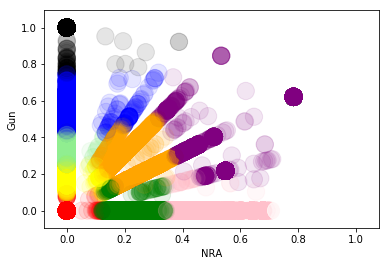

In [58]:
# Build our color map
colormap = { 0: 'red', 1: 'green', 2: 'blue',3: 'purple',4: 'yellow',5: 'black',6: 'white',7: 'orange'
           , 8: 'pink', 9: 'lightgreen'}
colors = idf_df.apply(lambda row: colormap[row.category], axis=1)

# Plot our scatter
ax = idf_df.plot(kind='scatter', x='nra', y='gun', alpha=0.1, s=300, c=colors)
ax.set_xlabel("NRA")
ax.set_ylabel("Gun")

In [62]:
order_centroids

array([[ 23,  64,  93, ...,  37, 136,   0],
       [ 54, 144,  57, ..., 145, 103, 137],
       [127,  54, 128, ..., 143,  26,  85],
       ...,
       [ 69, 145, 118, ..., 112, 113,   0],
       [ 90,  42,  80, ...,   2, 118,  85],
       [147,  54,  99, ...,  50,  26,  85]])

In [50]:
order_centroids[0, :5]
terms[9]

'american'

In [ ]:
# Assign the category to the dataframe
df['category'] = km.labels_

### Import tweets in dataframe

In [35]:
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.SMILEY,p.OPT.RESERVED,p.OPT.MENTION)
lmtzr = WordNetLemmatizer()
results = results_NRA + results_guns
def structure_results(results):
    id_list=[tweet.id for tweet in results]
   
    data=pd.DataFrame(id_list,columns=['id'])
    
###Clean text of the tweets
    data["text"]= [tweet.full_text.encode('utf-8') for tweet in results]
    data["text1"]= [p.clean(tweet.full_text) for tweet in results]
    #Escaping HTML Char
    data["text1"] = html_parser.unescape(data['text1'])
    data['text2'] = data['text1']
    data['polarity'] = [TextBlob(str(x)).sentiment[0] for x in data['text1']]
    data['sentiment'] = [TextBlob(str(x)).sentiment[1] for x in data['text1']]
    
#     # Decoding Data
    for ind,i in enumerate(data['text1']):
        
#         data['text1'][ind] = i.decode('utf-8').encode('ascii','ignore')
#     #Search for apostrophe and retrieve the full words
        data['text1'][ind] = decontracted(str(data['text1'][ind]))
#         data['sentiment'][ind] = TextBlob(str(data['text2'][ind])).sentiment[0]
#     #Remove Stop Words
       
        data['text1'][ind] = TextBlob(data['text1'][ind].lower()).words
        
        data['text1'][ind] = [lmtzr.lemmatize(lmtzr.lemmatize(w,pos="v"),pos='n') for w in data['text1'][ind] if w not in stop]
        data['text1'][ind] = ' '.join(data['text1'][ind])
        


    data["datetime"]=[tweet.created_at for tweet in results]
    data["Place"]=[tweet.place for tweet in results]
    data['UserLoc']=[tweet.user.location for tweet in results]
    data["Hashtags"]=[tweet.entities['hashtags'] for tweet in results]
 
    for ind,i in enumerate(data['Hashtags']):

        if i != []:
            mylist = i
            myvalues = [i['text'] for i in mylist if 'text' in i]
#             hashtags.append(myvalues)
#             data['Hashtags1'] = myvalues
#             print(myvalues)
        else:
            myvalues = ''

        data['Hashtags'][ind] = myvalues
    data["retweet_ct"]=[tweet.retweet_count for tweet in results]
    data["favorite_ct"]=[tweet.favorite_count for tweet in results]

    
    return data

In [201]:
#  for w in data['text1']:
a = ''.join(df['text1'][0])
TextBlob(df['text1'][0]).sentiment[1]

0.3277777777777778

In [129]:


id_list=[tweet.id for tweet in results_all]
   
data=pd.DataFrame(id_list,columns=['id'])
data["text"]= [tweet.full_text.encode('utf-8') for tweet in results]
data["text1"]= [tweet.full_text.encode('utf-8') for tweet in results]
#data['text'] = data['text'].decode('utf-8').encode('ascii','ignore')
for ind,i in enumerate(data['text']):
#     tweet = i.decode('utf-8').encode('ascii','ignore')
    data['text'][ind] = i.decode('utf-8').encode('ascii','ignore')
    data['text'][ind] = decontracted(str(data['text'][ind]))
    data['text1'][ind] = TextBlob(data['text'][ind]).words
    data['text1'][ind] = [w for w in data['text1'][ind] if w not in stop]
    


#     data['text'][ind] = [w for w in data['text'][ind] if w not in stop]
    


/Users/jennifer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jennifer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/jennifer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/jennifer/an

In [192]:
results[0]

Status(_json={'created_at': 'Mon Feb 26 23:59:59 +0000 2018', 'id': 968274478194184192, 'id_str': '968274478194184192', 'full_text': 'RT @sean_spicier: 25 years ago terrorists attacked the World Trade Center for the first time. This was before the NRA became responsible fo…', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'sean_spicier', 'name': 'Sean Spicier', 'id': 821511862881845248, 'id_str': '821511862881845248', 'indices': [3, 16]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 374096782, 'id_str': '374096782', 'name': 'KatiBarTheDoor', 'screen_name': 'k80krickt', 'location': 'Marlow, OK`', 'desc

In [205]:
df

,id,text,text1,text2,polarity,sentiment,datetime,Place,UserLoc,Hashtags,retweet_ct,favorite_ct
0,968274478194184192,b'RT @sean_spicier: 25 years ago terrorists attacked the World Trade Center for the first time. This was before the NRA became responsible fo\xe2\x80\xa6',25 year ago terrorist attack world trade center first time nra become responsible fo…,: 25 years ago terrorists attacked the World Trade Center for the first time. This was before the NRA became responsible fo…,0.116667,0.327778,2018-02-26 23:59:59,None,"Marlow, OK`",,506,0
1,968274478143741952,b'@CaseyCagle @Delta @NRA Sorry but when did the NRA become a protected class? Because last I checked they are a lobby organization and as a private company Delta has the right to cut ties with them. \n\nHave fun on the unemployment line when your elections come up!',sorry nra become protect class last check lobby organization private company delta right cut tie fun unemployment line election come,Sorry but when did the NRA become a protected class? Because last I checked they are a lobby organization and as a private company Delta has the right to cut ties with them. Have fun on the unemployment line when your elections come up!,0.032143,0.435476,2018-02-26 23:59:59,None,"San Francisco, CA",,0,0
2,968274478068150272,"b""RT @HuffPostPol: Parkland shooting survivor rips into NRA's Dana Loesch https://t.co/6SDQev1VUU""",parkland shoot survivor rip nra dana loesch,: Parkland shooting survivor rips into NRA's Dana Loesch,0.000000,0.000000,2018-02-26 23:59:59,None,none,,119,0
3,968274477908922369,b'RT @peterdaou: The #NRA and #GOP are accustomed to gun massacres fading out of the news cycle in short order. They rely on that ephemeralit\xe2\x80\xa6',nra gop accustom gun massacre fade news cycle short order rely ephemeralit…,: The #NRA and #GOP are accustomed to gun massacres fading out of the news cycle in short order. They rely on that ephemeralit…,0.000000,0.300000,2018-02-26 23:59:59,None,,"[NRA, GOP]",539,0
4,968274477904736257,b'@RennieTiffany @NBCNews @realDonaldTrump Prime member for over 5 years asking you to keep your relationship with NRA #ResignIsrael #ObamaGate',prime member 5 year ask keep relationship nra resignisrael obamagate,Prime member for over 5 years asking you to keep your relationship with NRA #ResignIsrael #ObamaGate,0.000000,0.000000,2018-02-26 23:59:59,None,"Chicago, IL","[ResignIsrael, ObamaGate]",0,0


#### Testing how the twitter packages clean the tweets

In [43]:
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.SMILEY,p.OPT.RESERVED,p.OPT.MENTION)
p.clean(s)

': 25 years ago terrorists attacked the World Trade Center for the first time. This was before the NRA became responsible fo…'

#### Handling Hashtags

In [229]:
df['Hashtags']

0    []                                                                           
1    []                                                                           
2    []                                                                           
3    []                                                                           
4    []                                                                           
5    [{'text': 'NRA', 'indices': [63, 67]}]                                       
6    []                                                                           
7    [{'text': 'MEMO', 'indices': [23, 28]}, {'text': 'Gun', 'indices': [69, 73]}]
8    []                                                                           
9    []                                                                           
Name: Hashtags, dtype: object

In [256]:
hashtags=[]
hashlist=[]
for i in df['Hashtags']:
    if i != []:
        mylist = i
        myvalues = [i['text'] for i in mylist if 'text' in i]
        hashtags.append(myvalues)


for i in hashtags:
    for j in i:
        hashlist.append(j)
print(h)

[['NRA'], ['MEMO', 'Gun']]
['NRA', 'MEMO', 'Gun']


In [242]:
import re
re.sub(' ','',str(df['Hashtags'])).split("'text':")[1]                            

"'NRA','indices':[63,67]}]\n6[]\n7[{"

In [ ]:
import re
re.sub(' ','','strip my spaces')

In [117]:
parameters = {"q": "NRA", "count":20}
response = requests.get("https://api.twitter.com/1.1/search/tweets.json",
                        params = parameters,
                        auth=oauth)


from pprint import pprint
pprint(response.json()['search_metadata'])

{'completed_in': 0.058,
 'count': 20,
 'max_id': 968979408274026496,
 'max_id_str': '968979408274026496',
 'next_results': '?max_id=968979404071342079&q=NRA&count=20&include_entities=1',
 'query': 'NRA',
 'refresh_url': '?since_id=968979408274026496&q=NRA&include_entities=1',
 'since_id': 0,
 'since_id_str': '0'}


In [118]:
tweets = response.json()['statuses']

print('PAGE 1')
for tweet in tweets:
    print(tweet['id'], tweet['text'])

PAGE 1
968979408274026496 RT @ChrisMurphyCT: So, wait...Republicans who take tens of thousands of dollars in NRA donations aren't POLITICIZING gun violence, but we a…
968979408122974209 RT @ProudResister: If you don’t think assault weapons play a factor in mass shootings then you either aren’t paying attention or you’re a R…
968979407883862016 RT @RonaldKlain: If you think the NRA-Russia connection is fanciful, here's an NRA statement from 2014 opposing Obama's sanctions on Russia…
968979407862943745 RT @StephenKing: The NRA thinking: "They're just kids. They'll get all excited about their proms or their Facebook walls or something; mayb…
968979407451951105 RT @ROCKONOHIO: Did you ever wonder why Japan never invaded the mainland of America during World War II? The emperor of Japan said, behind…
968979407355432960 RT @CAGOPUnknown: @ConservativeRG @just_old_joe @NRA @NRATV @DLoesch Nope, not a chance.
968979406986366976 @marcorubio You’re a hypocrite! The Terrrorist group, The NRA has b

In [12]:
search_url = "https://api.twitter.com/1.1/search/tweets.json"
next_page_url = search_url + response.json()['search_metadata']['next_results']

response = requests.get(next_page_url, auth=oauth)

print('PAGE 2')
for tweet in response.json()['statuses']:
    print(tweet['text'])

PAGE 2
RT @jchaltiwanger: Cc: @NRA @DLoesch https://t.co/B2rcWvvQ4t
RT @polly: This is the story of how a gun manufacturer sold nearly a million allegedly defective guns, which hurt cops, vets and NRA member…
@LetsGoWVPower No saying the NRA is a lobby for gun manufacturers and many vets arent NRA members at any rate
RT @krassenstein: NRA’s @DLoesch : “We absolutely do not” have responsibility to stop gun deaths

Actually, yes you do. You are an organiza…
@KellyO @realDonaldTrump @BarackObama @realDonaldTrump your  assertions are preposterous  You have a @GOP  problem  funded by the NRA
RT @bbusa617: FED EX Announces They Won’t Cave To Threats From Gun-Control Mob…Left Attacks Them  https://t.co/0OpBBusmti

FED EX REFUSES T…
RT @eugenegu: Thank you Dick's Sporting Goods for refusing to sell assault rifles and raising the minimum age of gun buyers to 21. Let's se…
@jimsciutto @ClarkePanther Yeah right...🙄 Trump will remain SEATED until #Putin, the #Koch’s, or the #NRA *TELL* him what he